In [1]:
# Let's make sure Keras is installed
import sys
!{sys.executable} -m pip install keras numpy > /dev/null
import matplotlib.pyplot as plt
import numpy as np

You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Introduction
In this example we create a classifier to recognize handwritten digits from the famous mnist dataset, using a convolutional neural network. Typically the training data is referred to as **X**, the training lables as **y**, and the test data and labesl as **X_test** and **y_test** respectively. Let's load the train/test data, and show one of the images with the help of the excellent matplotlib library:

Using TensorFlow backend.


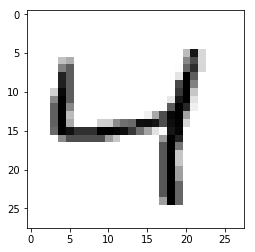

In [2]:
import keras.datasets as datasets

(X, y),  (X_test, y_test) = datasets.mnist.load_data()
digit = X[2]
plt.imshow(digit, cmap=plt.cm.binary)

Let's now define the network using convolutional layers. In this instance we used 3 convolutional layers with max pooling layers in between:

In [3]:
from keras import models
from keras import layers


net = models.Sequential()
net.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
net.add(layers.MaxPool2D(2, 2))
net.add(layers.Conv2D(64, (3, 3), activation='relu'))
net.add(layers.MaxPool2D(2, 2))
net.add(layers.Conv2D(64, (3, 3), activation='relu'))

In order to predict the number each image represents we use a couple of dense layers, but before we need to flatten the matrix coming from the last convolutional layer into a vector:

In [4]:
net.add(layers.Flatten())
net.add(layers.Dense(64, activation='relu'))
net.add(layers.Dense(10, activation='softmax'))

Finally let's compile the network with an appropriate optimizer, loss and performance metric:

In [5]:
net.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

And we are ready to train a model, but before we need to reshape and normalize the images, and apply **one-hot-encoding** to the labels.

In [6]:
from keras.utils import to_categorical

# Reshape and normalize the images
X = X.reshape((len(X), 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((len(X_test), 28, 28, 1)).astype('float32') / 255

# on-hot-encode the labels
y = to_categorical(y)
y_test = to_categorical(y_test)

In [7]:
net.fit(X, y, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 29s 484us/step - loss: 0.1769 - acc: 0.9445
Epoch 2/5
60000/60000 [==============================] - 29s 483us/step - loss: 0.0497 - acc: 0.9847
Epoch 3/5
60000/60000 [==============================] - 29s 481us/step - loss: 0.0337 - acc: 0.9894
Epoch 4/5
60000/60000 [==============================] - 29s 483us/step - loss: 0.0260 - acc: 0.9919
Epoch 5/5
60000/60000 [==============================] - 29s 484us/step - loss: 0.0210 - acc: 0.9934


Let's see how our model performs on the test dataset.

In [8]:
net.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 173us/step


[0.03266568964242761, 0.9897]

remember that in our previous notebook we obtained a test accurary of $0.977$.